#APLICANDO AO MEU GRAFO

In [171]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt

In [172]:
class OpenGraph:
    def __init__(self, archive):
        self.nvertex, self.adjmatrix, self.adjlist = self.openFile(archive)
        self.edges = []

    def openFile(self, archive):
        with open(archive, 'r') as file:
            nvertex = int(file.readline())
            line = file.readlines()
            adjmatrix = [list(map(lambda x: int(x), l.split())) for l in line[0:]]
            adjlist = [[] for _ in range(nvertex)]

            for i in range(nvertex):
                for j in range(nvertex):
                    if adjmatrix[i][j] == 1:
                        adjlist[i].append(j)

        return nvertex, adjmatrix, adjlist

    def printMatrix(self):
        print("Adjacency Matrix:")
        print(" ", np.arange(1, len(self.adjmatrix)+1, 1))
        for i, l in enumerate(self.adjmatrix):
            print(f'{i} |{" ".join(map(str, l))}')

    def printList(self):
        print("\nAdjacency List:")
        for i, ladj in enumerate(self.adjlist):
            print(f'{i}: {"-> ".join(map(str, ladj))}')
            
    def Edges(self): # getting all graph edges
      for i in range(0, len(self.adjlist)): 
        for j in self.adjlist[i]: 
          if (j,i) not in self.edges: #nao quero que seja uma tupla, pois nao poderei modificar
            self.edges.append((i,j)) 
      #print("Edges: ",  self.edges)
      return self.edges

In [173]:

class Karger:
    def __init__(self, vertices,edges):        
        self.V = vertices
        self.edges = edges
        
        
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
    
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
            
    def indice(self, aresta, edges):
        index = None
        for i, edge in enumerate(edges):
            if edge == aresta:
                index = i
                break
        return index
            
    def kargerMinCut(self, count):
        
        narestas = [0]*count
        corteminimo = [0]*count
        edgeslist = copy.deepcopy(self.edges)

        while (count > 0): 
            parent = [i for i in range(self.V)]
            rank = [0] * self.V
            v = self.V #size
            while v > 2:
                #ESCOLHENDO AS ARESTAS
                i = random.randint(0, len(edgeslist) - 1)
                u, w = edgeslist[i]
                setU = self.find(parent, u)
                setW = self.find(parent, w)
             
                if setU != setW: #
                    v -= 1
                    self.union(parent, rank, setU, setW)

                edgeslist.pop(i)

            
            minCut = 0

           # print("Entrando na contagem de Cuts")
            for u, w in edgeslist:
                setU = self.find(parent, u)
                setW = self.find(parent, w)
                if setU != setW:
                    minCut += 1
            #return minCut
        
            count -= 1
            n = len(edgeslist)
            #print("Aresta Final:", edgeslist)
            edgeslist = copy.deepcopy(self.edges)
            narestas[count] = n
            corteminimo[count] = minCut
        # print("--------------------------------------------------------------------------------")
        # print("N Aresta Final:", narestas)
        # print("max Arestas", max(narestas))
        # print("min Arestas", min(narestas))
        # print("MinCut", corteminimo)
        minimo = min(narestas)
        nmin = corteminimo.count(minimo)
        probabilidade = nmin / len(corteminimo)
        print("Probabilidade de encontrar o corte minimo", probabilidade)
    
    
        return probabilidade

        
        
        

In [174]:
#OPEN GRAPH
archive = 'graph02.txt'
graph = OpenGraph(archive)
#graph.printMatrix()
#graph.printList()
arestas = graph.Edges()
#print("Arestas: ",arestas)

Probabilidade de encontrar o corte minimo 0.4
Probabilidade de encontrar o corte minimo 0.3
Probabilidade de encontrar o corte minimo 0.16
Probabilidade de encontrar o corte minimo 0.4
Probabilidade de encontrar o corte minimo 0.6
Probabilidade de encontrar o corte minimo 0.57
Probabilidade de encontrar o corte minimo 0.616
[0.4, 0.3, 0.16, 0.4, 0.6, 0.57, 0.616]


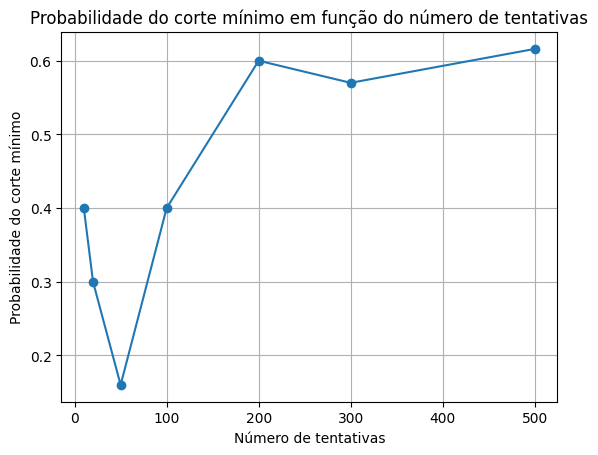

In [175]:
# Create a graph
g = Karger(graph.nvertex, arestas);
# Set seed for random number generation
random.seed()
# Find the minimum cut
probabilidade = []
count = [10, 20, 50, 100, 200, 300, 500]
for n in count:
    probabilidade.append(g.kargerMinCut(n));

print(probabilidade)

plt.plot(count, probabilidade, marker='o')
plt.xlabel('Número de tentativas')
plt.ylabel('Probabilidade do corte mínimo')
plt.title('Probabilidade do corte mínimo em função do número de tentativas')
plt.grid(True)
plt.show()
